# **Team Data**
- Annisa Ul Alliya
- Diaz Prisheila Dharmawan
- Eunike Larasati Zipora Alelang
- Mutiara Puspita Maharani
- Mohammad Lucky Kurniawan

## Project Preparation

* Data source utama : https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide & https://www.kaggle.com/datasets/mabdullahsajid/tracking-global-co2-emissions-1990-2023?select=wide_format_co2_emission_dataset.csv
* Data source pendukung : https://www.kaggle.com/datasets/jawadawan/global-warming-trends-1961-2022
* EDA example https://www.kaggle.com/code/redpen12/churn-prediction-in-depth-eda-and-interpretations#Hypothesis-Testing

## Data Preparation

In [ ]:
# Import Library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Import data dari CSV ke dataframe
df = pd.read_csv('https://raw.githubusercontent.com/eunikelarasati/datatrackingcarbon/main/final_data_zenius.csv')

## Data Understanding

In [ ]:
df.head(3)

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Country,1990,1991,...,2008,2009,2010,2011,2012,2013,2014,2015,2018,2021 ;
0,1958,1,1958.0411,NaN,NaN,NaN,NaN,Afghanistan,0.2,0.2,...,0.2,0.2,0.3,0.4,0.4,0.3,0.3,0.3,0.3,8.35;
1,1958,2,1958.1260,NaN,NaN,NaN,NaN,Albania,2.3,1.2,...,1.6,1.5,1.5,1.6,1.7,1.7,2,1.6,1.6,4.59;
2,1958,3,1958.2027,315.69,314.42,316.18,314.89,Algeria,3,3,...,3.2,3.4,3.3,3.3,3.5,3.5,3.7,3.9,3.9,173;


#### Data Description
* Year,  Month, Decimal Date	: pengcantuman tanggal dalam format tambahan berikut: tahun, bulan, dan tanggal desimal
* Carbon Dioxide (ppm) : Konsentrasi CO2 bulanan dalam bagian per juta (ppm) diukur pada skala kalibrasi 08A dan dikumpulkan pada pukul 24:00 pada tanggal lima belas setiap bulan.
* Seasonally Adjusted CO2 (ppm) : Menyediakan data yang sama setelah penyesuaian musiman, yang melibatkan pengurangan kecocokan 4-harmonik dari data dengan faktor penguatan linier untuk menghilangkan siklus musiman dari pengukuran karbon dioksida
* Carbon Dioxide Fit (ppm) : Menyediakan data dengan noise yang dihilangkan, dihasilkan dari fungsi spline kubik kaku ditambah fungsi 4-harmonik dengan penguatan linier
* Seasonally Adjusted CO2 Fit (ppm) : Data yang sama dengan siklus musiman yang dihilangkan.
* Country	: nama negara dan wilayah
* 1990 - 2023 : Rangkaian waktu yang luas mulai dari tahun 1990 hingga 2023, memungkinkan adanya perspektif historis yang komprehensif mengenai emisi.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Year                                720 non-null      object 
 1   Month                               1048570 non-null  object 
 2   Decimal Date                        715 non-null      float64
 3   Carbon Dioxide (ppm)                698 non-null      float64
 4   Seasonally Adjusted CO2 (ppm)       698 non-null      float64
 5   Carbon Dioxide Fit (ppm)            702 non-null      float64
 6   Seasonally Adjusted CO2 Fit (ppm)   702 non-null      float64
 7   Country                             715 non-null      object 
 8   1990                                194 non-null      object 
 9   1991                                194 non-null      object 
 10  1992                                194 non-null      object 
 11  1993       

In [ ]:
df.nunique()

Year                                   65
Month                                  13
Decimal Date                          715
Carbon Dioxide (ppm)                  676
Seasonally Adjusted CO2 (ppm)         663
Carbon Dioxide Fit (ppm)              675
Seasonally Adjusted CO2 Fit (ppm)     702
Country                               195
1990                                   84
1991                                   87
1992                                   97
1993                                   93
1994                                   94
1995                                   96
1996                                   92
1997                                   91
1998                                   91
1999                                   92
2000                                   88
2001                                   94
2002                                   94
2003                                   98
2004                                   94
2005                              

In [ ]:
df.describe()

,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),1995,2000,2001,2002,2003,2004,2005,2006,2007,2015,2018
count,715.000000,698.000000,698.000000,702.000000,702.00000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1988.142304,352.587364,352.588238,352.262208,352.25933,4.771649,4.844330,4.789175,4.762887,4.943299,5.054639,5.139175,5.130928,5.222680,5.049485,5.198454
std,17.302063,26.213106,26.140570,26.215391,26.15070,6.758619,6.932449,6.123135,5.868495,6.137372,6.539351,7.118487,6.607883,6.867299,6.861904,7.038845
min,1958.041100,313.210000,314.420000,312.450000,314.89000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.245200,328.925000,329.482500,328.542500,328.96750,0.500000,0.700000,0.700000,0.700000,0.700000,0.725000,0.700000,0.700000,0.700000,0.825000,0.825000
50%,1988.204900,350.140000,350.590000,349.875000,349.82500,2.350000,2.400000,2.750000,2.800000,2.950000,3.000000,3.200000,3.250000,3.100000,2.700000,2.750000
75%,2003.083550,373.467500,373.142500,373.225000,372.85750,7.100000,6.650000,7.300000,7.475000,7.475000,7.500000,7.450000,7.550000,7.500000,6.400000,6.725000
max,2017.956200,407.650000,406.040000,407.280000,405.83000,58.600000,56.300000,43.200000,40.900000,41.800000,50.500000,64.200000,49.500000,55.400000,56.100000,58.000000


## Data Cleaning

In [ ]:
# menghapus duplikat
df.drop_duplicates()

In [ ]:
# mengganti nama kolom
df = df.rename(columns = {'2021 ;':'2021'})
df.head(2)

In [ ]:
# mengubah tipe data ke tipe numerik
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['1990'] = pd.to_numeric(df['1990'], errors='coerce')
df['1991'] = pd.to_numeric(df['1991'], errors='coerce')
df['1992'] = pd.to_numeric(df['1992'], errors='coerce')
df['1993'] = pd.to_numeric(df['1993'], errors='coerce')
df['1994'] = pd.to_numeric(df['1994'], errors='coerce')
df['1996'] = pd.to_numeric(df['1996'], errors='coerce')
df['1997'] = pd.to_numeric(df['1997'], errors='coerce')
df['1998'] = pd.to_numeric(df['1998'], errors='coerce')
df['1999'] = pd.to_numeric(df['1999'], errors='coerce')
df['2008'] = pd.to_numeric(df['2008'], errors='coerce')
df['2009'] = pd.to_numeric(df['2009'], errors='coerce')
df['2010'] = pd.to_numeric(df['2010'], errors='coerce')
df['2011'] = pd.to_numeric(df['2011'], errors='coerce')
df['2012'] = pd.to_numeric(df['2012'], errors='coerce')
df['2013'] = pd.to_numeric(df['2013'], errors='coerce')
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')

In [ ]:
df.info()

## Exploratory Data Analysis

### Barplot

In [ ]:
# mengambil data pada 10 tahun terakhir
df10 = df[(df.Year >= 2008)]
df10

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Country,1990,1991,...,2008,2009,2010,2011,2012,2013,2014,2015,2018,2021
600,2008.0,1.0,2008.0410,385.07,385.05,384.62,384.58,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,2008.0,2.0,2008.1257,385.84,385.13,385.45,384.72,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,2008.0,3.0,2008.2049,385.83,384.29,386.43,384.86,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,2008.0,4.0,2008.2896,386.77,384.00,387.80,385.01,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,2008.0,5.0,2008.3716,388.51,385.21,388.47,385.17,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2017.0,8.0,2017.6219,NaN,NaN,NaN,NaN,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,2017.0,9.0,2017.7068,NaN,NaN,NaN,NaN,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,2017.0,10.0,2017.7890,NaN,NaN,NaN,NaN,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,2017.0,11.0,2017.8740,NaN,NaN,NaN,NaN,;,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


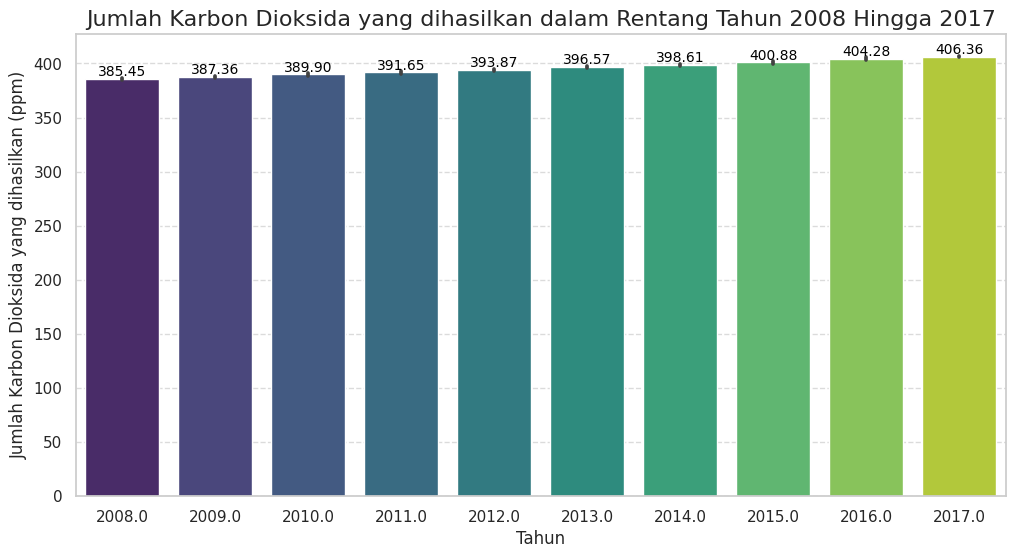

In [ ]:
sns.set_theme(style="whitegrid")

# plot barplot dengan seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df10, x='Year', y='Carbon Dioxide (ppm)', palette='viridis')

# menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# menambahkan label dan judul
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Karbon Dioksida yang dihasilkan (ppm)', fontsize=12)
plt.title('Jumlah Karbon Dioksida yang dihasilkan dalam Rentang Tahun 2008 Hingga 2017', fontsize=16)

# menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# menampilkan plot
plt.show()

Berdasarkan grafik diatas diketahui bahwa dalam 10 tahun terakhir (2008-2017) jumlah karbon dioksida yang dihasilkan mengalami peningkatan. Walaupun peningkatan di setiap tahunnya tidak terlalu signifikan tetapi kenaikan selalu terjadi. Fenomena ini akan **berakibat buruk jika terus dibiarkan**, taraf karbon dioksida akan terus meningkat seiring dengan pertambahan waktu.

### Scatter Plot

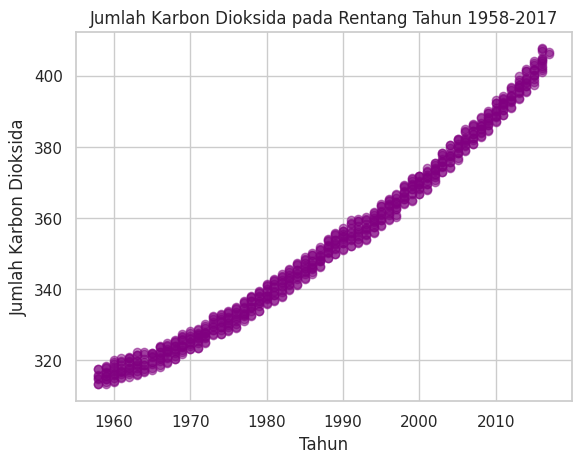

In [ ]:
# scatter plot menggunakan matplotlib
plt.scatter(df['Year'], df['Carbon Dioxide (ppm)'], color = 'purple', alpha = 0.5, marker = 'o')

plt.title('Jumlah Karbon Dioksida pada Rentang Tahun 1958-2017')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karbon Dioksida')
plt.grid(True)

plt.show()

Grafik ini menunjukkan hubungan antara tahun (sumbu x) dan konsentrasi karbon dioksida (CO2) dalam unit parts per million (ppm) pada rentang tahun 1958 hingga 2017 dapat terlihat tren konsentrasi karbon dioksida selama rentang waktu tersebut cenderung naik seiring berjalannya waktu, itu menunjukkan peningkatan konsentrasi karbon dioksida dari tahun ke tahun.

### Boxplot

In [ ]:
# data per 10 tahun
dfper10 = df
dfper10['per10tahun'] = (dfper10['Year'] // 10)* 10
dfper10.head(3)

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Country,1990,1991,...,2009,2010,2011,2012,2013,2014,2015,2018,2021,per10tahun
0,1958.0,1.0,1958.0411,NaN,NaN,NaN,NaN,Afghanistan,0.2,0.2,...,0.2,0.3,0.4,0.4,0.3,0.3,0.3,0.3,NaN,1950.0
1,1958.0,2.0,1958.1260,NaN,NaN,NaN,NaN,Albania,2.3,1.2,...,1.5,1.5,1.6,1.7,1.7,2.0,1.6,1.6,NaN,1950.0
2,1958.0,3.0,1958.2027,315.69,314.42,316.18,314.89,Algeria,3.0,3.0,...,3.4,3.3,3.3,3.5,3.5,3.7,3.9,3.9,NaN,1950.0


Text(0.5, 1.0, 'Jumlah Karbon Dioksida pada Rentang Tahun 1958-2017')

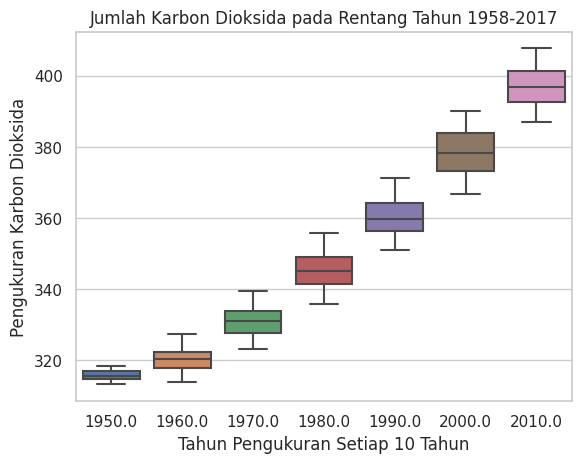

In [ ]:
sns.boxplot(data=dfper10, x='per10tahun', y='Carbon Dioxide (ppm)')

plt.xlabel('Tahun Pengukuran Setiap 10 Tahun')
plt.ylabel('Pengukuran Karbon Dioksida')
plt.title('Jumlah Karbon Dioksida pada Rentang Tahun 1958-2017')

Dalam grafik data pengukuran per 10 tahun diatas diketahui bahwa kenikan jumlah karbon terbesar terjadi pada tahun 2000-2009. Dan jumlah karbon dioksida terendah terjadi pada tahun 1950-1959, hal ini dapat disebabkan oleh belum banyaknya perusahaan yang menghasilkan emisi dalam proses produksinya maupun kendaraan yang belum banyak beroperasi pada tahun tersebut.


# Checking Outliers and Anomali Handling

Akan dilihat nilai outliers pada kolom numerik menggunakan boxplot. Kolom numerik setelah handling missing values terdapat 36 kolom.

In [ ]:
nums = [i for i in df.columns if df[i].dtypes != 'object']

In [ ]:
len(nums)

36

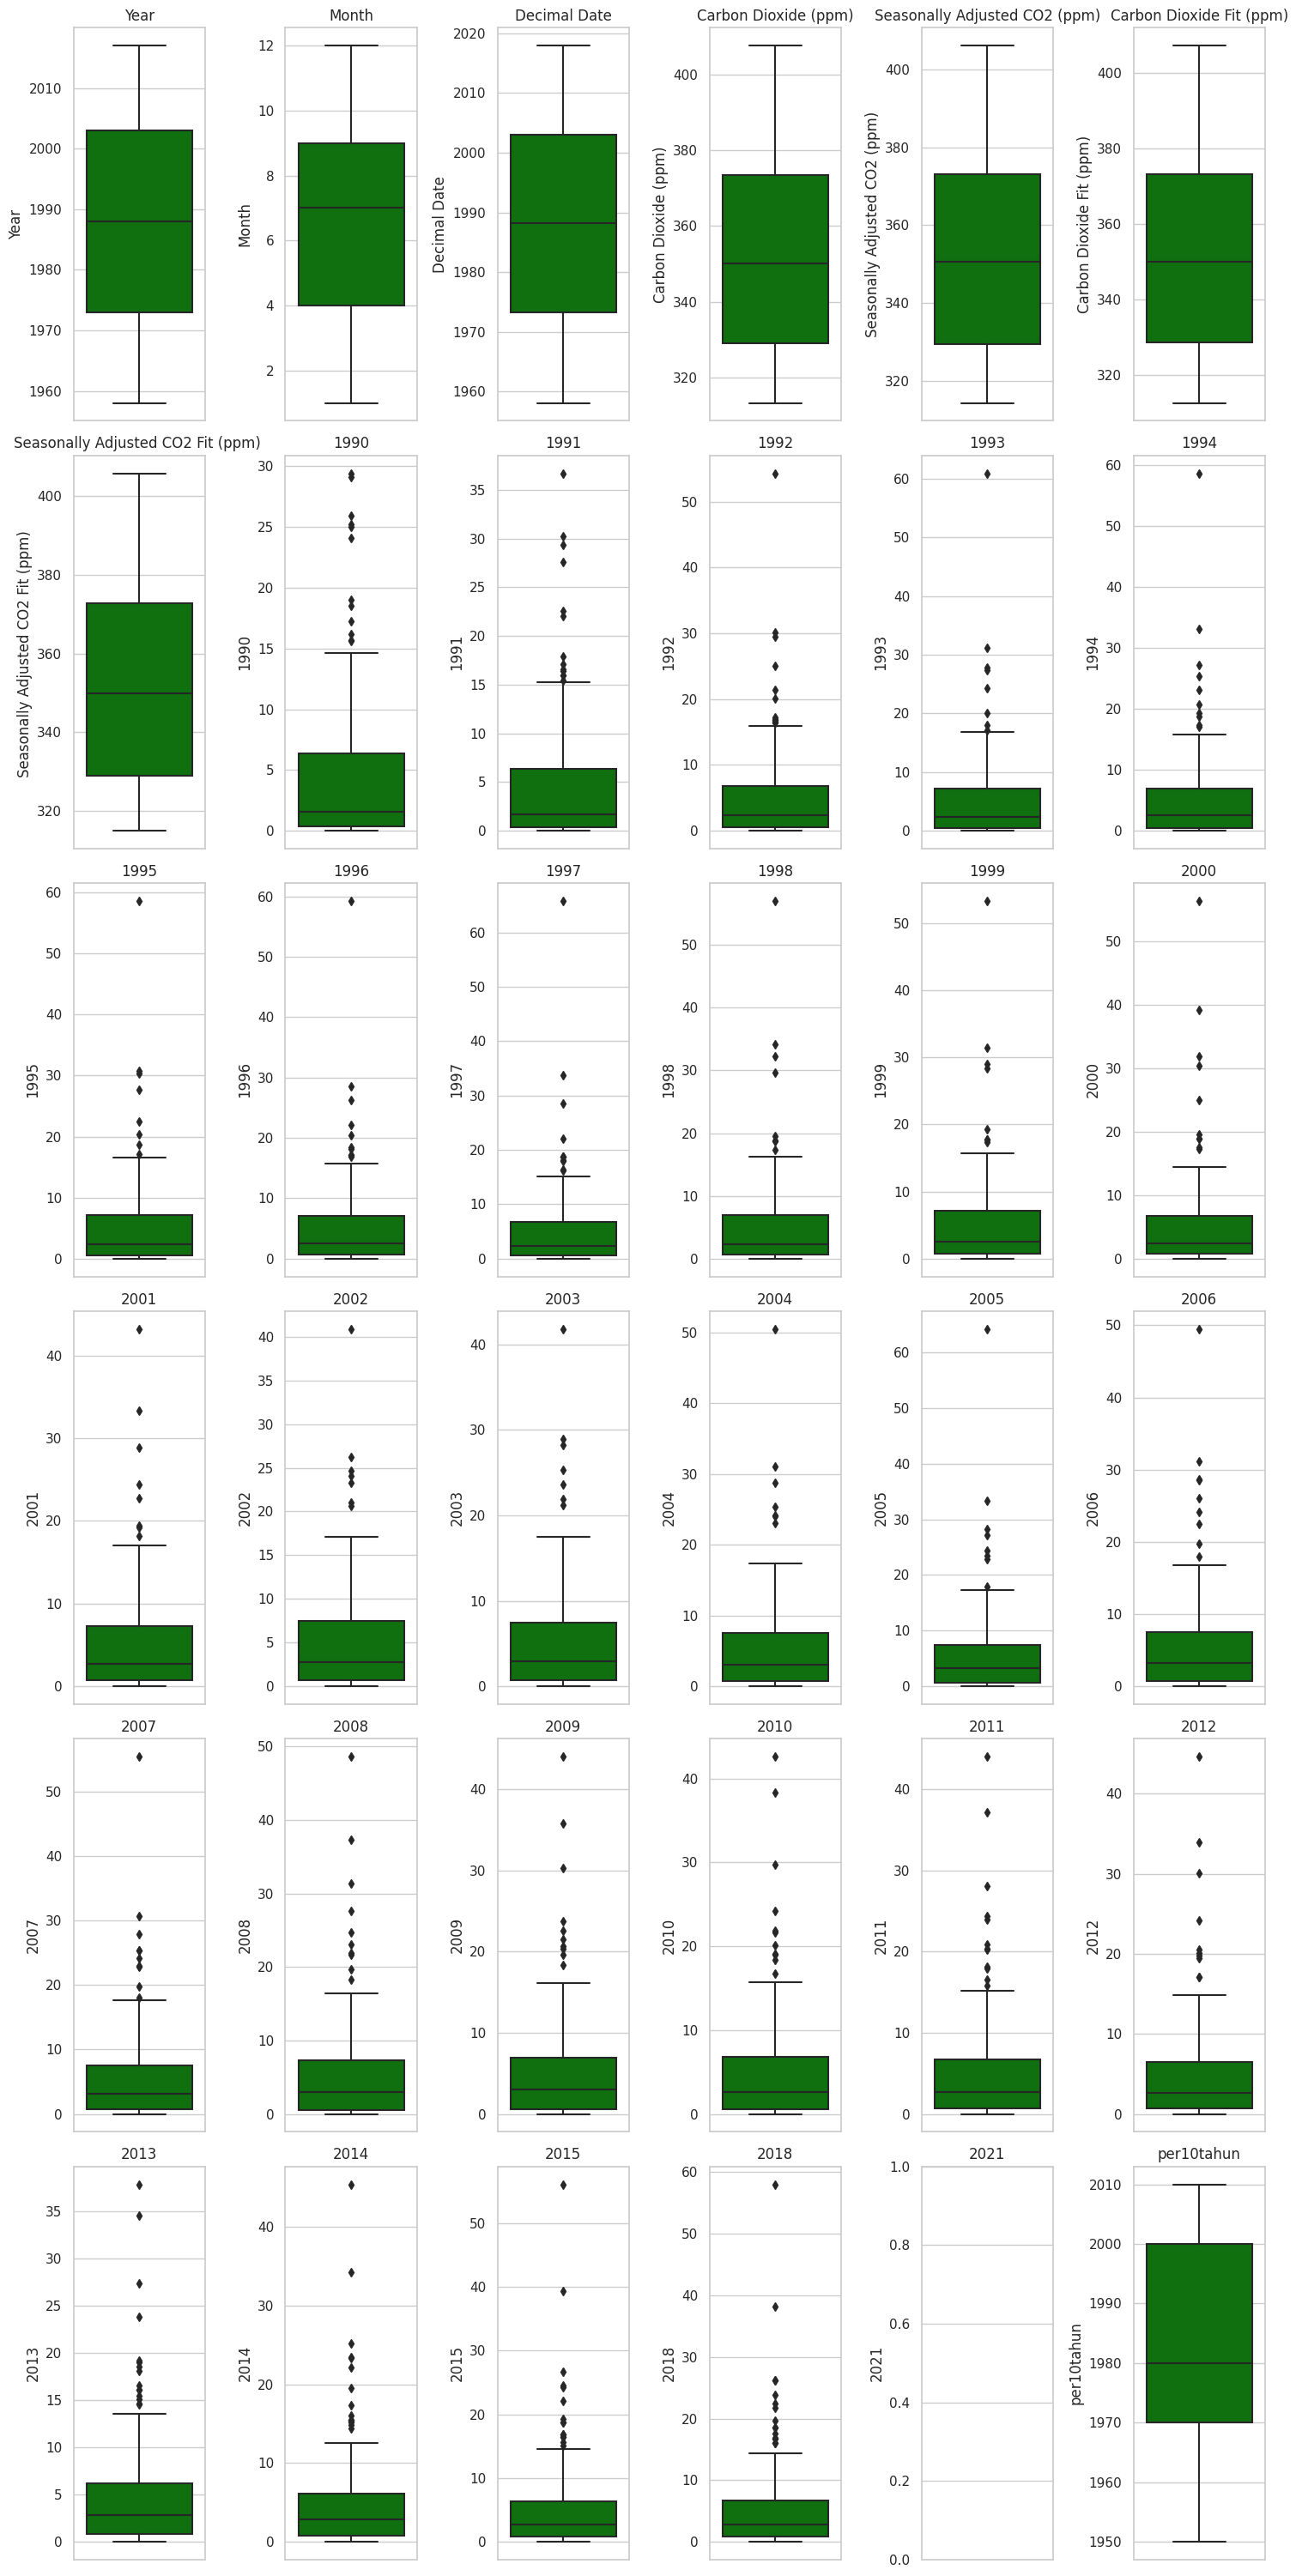

In [ ]:
plt.figure(figsize=(15, 60))
for i in range(len(nums)):
    plt.subplot(12, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.title(nums[i])
    plt.tight_layout()
plt.show()

<Axes: ylabel='Carbon Dioxide (ppm)'>

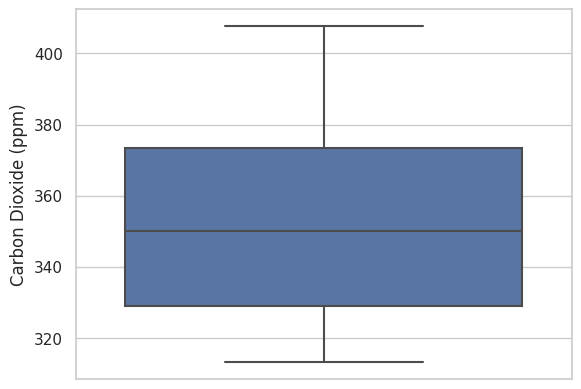

In [ ]:
sns.boxplot(y=df['Carbon Dioxide (ppm)'], data=df, orient='v')

Dalam hal ini terdapat nilai anomali yakni 400 pada kolom Carbon Dioxide (ppm), hal tersebut telah dijelaskan pada data analysis, dan pada tahap ini, baris tersebut akan dihapus.

In [ ]:
data=df
data['Carbon Dioxide (ppm)'].max()

407.65

In [ ]:
data['Carbon Dioxide (ppm)'].value_counts().max()

3

Banyaknya baris pada Year yang memiliki nilai max ada 3 baris. Baris tersebut akan dihapus.

In [ ]:
max_value = data['Carbon Dioxide (ppm)'].max()
filter = data['Carbon Dioxide (ppm)']==max_value
data.drop(data[filter].index, inplace=True)

data.shape

(1048574, 37)

Ukuran data menjadi 694 baris dan 2 kolom.

<Axes: ylabel='Carbon Dioxide (ppm)'>

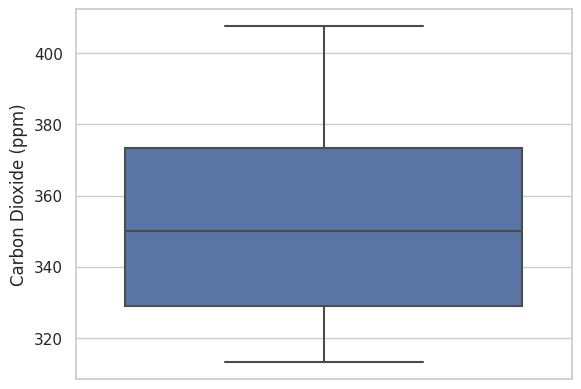

In [ ]:
sns.boxplot(y=data['Carbon Dioxide (ppm)'], data=data,orient = 'v')

Terlihat dari boxplot sudah tidak ada nilai anomali dan nilai maksimalnya menjadi 407.57

In [ ]:
data['Carbon Dioxide (ppm)'].max()

407.57

# Carbon di Indonesia

In [ ]:
# data karbon di Indo
df[(df.Country == 'Indonesia')]

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Country,1990,1991,...,2009,2010,2011,2012,2013,2014,2015,2018,2021,per10tahun
86,1965.0,3.0,1965.2027,320.89,319.58,321.08,319.76,Indonesia,0.8,1.0,...,1.9,1.8,2.3,2.6,1.9,1.8,1.9,2.1,NaN,1960.0


In [ ]:
data = {'year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018],
        'carbon dioxide': [0.8, 1, 1.1, 1.2, 1.2, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.4, 1.4, 1.5, 1.6, 1.5, 1.8, 1.8, 1.9, 1.8, 2.3, 2.6, 1.9, 1.8, 1.9, 2.1]}

# Membuat DataFrame
idn = pd.DataFrame(data)
idn.head(3)

,year,carbon dioxide
0,1990,0.8
1,1991,1.0
2,1992,1.1


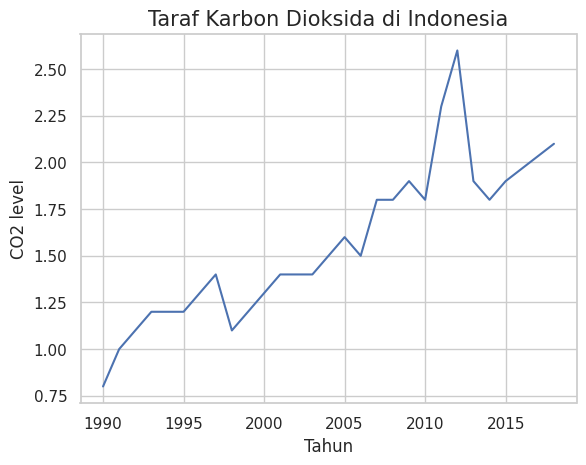

In [ ]:
# lineplot perkembangan carbon di Indonesia
plt.plot(idn['year'], idn['carbon dioxide'])
plt.xlabel('Tahun')
plt.ylabel('CO2 level')
plt.title('Taraf Karbon Dioksida di Indonesia', fontsize = 15)
plt.show()

Dari grafik perkembangan tingkat karbon dioksida (CO2) di Indonesia, beberapa insight dan informasi yang dapat diperoleh antara lain:

- Terlihat bahwa tingkat karbon dioksida cenderung meningkat dari tahun ke tahun. Hal ini mengindikasikan bahwa emisi karbon dioksida di Indonesia mengalami peningkatan selama periode yang diamati.

- Terdapat fluktuasi kecil dalam tingkat CO2 antara tahun 1990 hingga 2010, namun setelah itu terlihat peningkatan yang lebih signifikan. Pada tahun-tahun terakhir (2014-2015), tingkat CO2 nampaknya sedikit menurun, tetapi tetap tinggi.

- Grafik menunjukkan adanya puncak-puncak tertentu dalam emisi karbon dioksida, seperti pada tahun 2012 dan 2018. Peningkatan signifikan dalam beberapa tahun tertentu ini dapat disebabkan oleh faktor-faktor tertentu seperti perubahan dalam struktur ekonomi, kebijakan energi, atau peristiwa khusus.

- Data terakhir yang tersedia adalah untuk tahun 2015. Oleh karena itu, kita tidak memiliki informasi lebih lanjut tentang perkembangan setelah tahun 2015. Pemantauan lebih lanjut diperlukan untuk memahami apakah ada perubahan tren atau kebijakan yang mempengaruhi tingkat karbon dioksida setelah tahun 2015.



# Simple Linear Regression

In [ ]:
# Memeriksa dan Memilih Data
data = df[['Year', 'Carbon Dioxide (ppm)']]
print(data.head())
print(data.dtypes)

     Year  Carbon Dioxide (ppm)
0  1958.0                   NaN
1  1958.0                   NaN
2  1958.0                315.69
3  1958.0                317.45
4  1958.0                317.50
Year                    float64
Carbon Dioxide (ppm)    float64
dtype: object


In [ ]:
# Data Cleaning
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Carbon Dioxide (ppm)'] = pd.to_numeric(data['Carbon Dioxide (ppm)'], errors='coerce')

data = data.dropna(subset=['Year', 'Carbon Dioxide (ppm)'])

In [ ]:
# Membuat dan Melatih Model Regresi Linier
X = data[['Year']]
y = data['Carbon Dioxide (ppm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mengevaluasi model dengan menghitung Mean Squared Error pada set pengujian.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 14.891442503918883
Mean Absolute Error: 3.1290762582259988
R-squared: 0.9785464905606834


> **Mean Squared Error (MSE):** MSE mengukur rata-rata dari kuadrat perbedaan antara nilai prediksi (output model) dengan nilai aktual (data yang sebenarnya). Semakin kecil nilai MSE, semakin baik model regresi Anda dalam memprediksi data. Ini berarti model Anda memiliki tingkat kesalahan yang lebih rendah. MSE mengukur tingkat ketepatan (akurasi) dari prediksi model, dan lebih rendah lebih baik.

> **Mean Absolute Error (MAE):** MAE mirip dengan MSE, tetapi mengukur rata-rata dari nilai absolut perbedaan antara prediksi dan nilai aktual. Seperti MSE, semakin kecil nilai MAE, semakin baik performa model regresi Anda dalam memprediksi data. MAE juga mengukur tingkat kesalahan atau akurasi prediksi, tetapi memberikan penalti yang lebih rendah untuk kesalahan besar daripada MSE.

> **R-squared (R2):** R2 mengukur sejauh mana variasi dalam data target yang dapat dijelaskan oleh model Anda. Nilai R2 berkisar antara 0 dan 1. Nilai R2 mendekati 1 menunjukkan bahwa model Anda sangat baik dalam menjelaskan variasi dalam data. Jika R2 mendekati 0, maka model Anda gagal menjelaskan variasi dalam data. Dengan kata lain, semakin mendekati 1 nilai R2, semakin baik model regresi Anda dalam memfittingkan data.

Dari nilai-nilai ini, bisa dibilang bahwa model ini telah memberikan hasil yang sangat baik dalam memprediksi data. Nilai MSE dan MAE yang rendah menunjukkan bahwa model ini memiliki tingkat kesalahan yang rendah, dan nilai R2 yang mendekati 1 menunjukkan bahwa model Anda mampu menjelaskan sebagian besar variasi dalam data.

In [ ]:
# Membuat Forecast untuk 10 tahun mendatang
years_to_predict = np.array([[2021], [2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]])
predicted_co2 = model.predict(years_to_predict)
print(predicted_co2)

[403.94981446 405.48391741 407.01802035 408.5521233  410.08622624
 411.62032919 413.15443213 414.68853508 416.22263802 417.75674097]


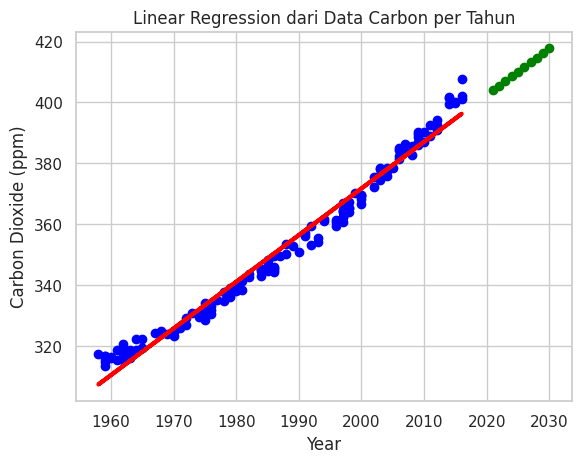

In [ ]:
# Visualisasi
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.scatter(years_to_predict, predicted_co2, color='green') # prediksi untuk tahun mendatang
plt.xlabel('Year')
plt.ylabel('Carbon Dioxide (ppm)')
plt.title('Linear Regression dari Data Carbon per Tahun')
plt.show()

Dari hasil grafik modelling menggunakan linear regression dapat dilihat bahwa hubungan antara carbon dioxide (ppm) dan year memiliki hubungan positif antar variable. Yang berarti jika tahunnya semakin tinggi maka tingkat carbon dioxide (ppm) juga akan ikut tinggi/meningkat. Dari grafik diatas dapat dilihat bahwa carbon dioxide (ppm) sudah mencapai angka >400 ton dan **diperkirakan jumlah carbon dioxide (ppm) ini akan terus meningkat seiring bertambahnya tahun**.

# **Data Pendukung :**
# Dampak Kenaikan Carbon : Kenaikan Suhu


In [ ]:
# import dataset pendukung
df1 = pd.read_csv('https://raw.githubusercontent.com/eunikelarasati/datatrackingcarbon/main/global_warming_trends.csv')
df1.head(3)

#### Data Description
* Country : nama negara - negara.
* ISO: Kode negara ISO 3166-1 alpha-3.
* Year: Tahun pencatatan suhu.
* Temperature: Suhu permukaan tahunan (dalam derajat Celcius) untuk tahun dan negara yang bersangkutan.

In [ ]:
#check data NaN
df1.isnull().sum()

In [ ]:
# memisahkan tipe data
numerical_features = df1.select_dtypes(include=['float64', 'int64'])
categorical_features = df1.select_dtypes(include=['object'])

In [ ]:
# menghapus duplikat
df1.drop_duplicates()

In [ ]:
# Menghilangkan nilai 'F' menjadi string kosong ('') pada kolom tertentu
df1['Year'] = df1['Year'].str.replace('F', '')

In [ ]:
# Kelompokkan data per 10 tahun
df1['Year'] = pd.to_datetime(df1['Year'])
df1['Year_Grouped'] = df1['Year'].dt.year // 10 * 10

# Membuat grafik line plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(x='Year_Grouped', y='Temperature', data=df1, ci=None, marker='o', color='red')

# Menambahkan judul dan label
plt.title('Distribution Temperature per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Menampilkan plot
plt.show()


Dari grafik line plot diatas, terjadi kenaikan yang menunjukan hubungan antar variable tersebut positif. Dengan melihat grafik line plot diatas ini dapat diprediksi bahwa **tingkat rata - rata temperature setiap tahunnya akan terus meningkat**. Hal ini berbanding lurus dengan grafik Carbon yang ada di Dunia terkhususnya Indonesia dimana setiap tahunnya mengalami peningkatan. Sehingga, dapat disimpulkan Carbon CO2 dan Temperature memiliki hubungan dan saling terkait satu sama lain.

In [ ]:
# # Mendownload data set yang telah di olah untuk pembuatan dasboard
# from google.colab import files

# # Simpan data frame ke dalam file CSV
# df.to_csv('data_carbon_co2_clean.csv', index=False)
# df1.to_csv('global_warming_trends_clean.csv', index=False)

# # Download file CSV
# files.download('data_carbon_co2_clean.csv')
# files.download('global_warming_trends_clean.csv')

# Link Looker :
https://lookerstudio.google.com/reporting/ded04b48-a7b1-4529-87c2-f3d333a6855b